# Transformasi Fourier 2D

Diberikan sinyal $x(n_1, n_2) = e^{j(\omega_1'n_1 + \omega_2'n_2)}$ yang merepresentasikan sinyal input 2D (image). Kemudian diproses ke dalam suatu fungsi $h(n_1,n_2)$ sehingga menghasilkan sinyal output $y(n_1,n_2)$. Ini berarti kita konvolusikan sinyal $x$ dengan fungsi $h$ atau dapat ditulis

\begin{eqnarray}
y(n_1,n_2)&=&x(n_1,n_2) \circledast h(n_1,n_2) \\
          &=&\sum_{k_1=-\infty}^{\infty} \sum_{k_2=-\infty}^{\infty} e^{j \omega_1'(n_1-k_1)} e^{j \omega_2'(n_2-k_2)} h(k_1,k_2) \\
          &=& e^{j \omega_1' n_1} e^{j \omega_2' n_2} \sum_{k_1=-\infty}^{\infty} \sum_{k_2=-\infty}^{\infty} h(k_1,k_2) e^{-j \omega_1'k_1} e^{-j \omega_2'k_2} \\
          &=& e^{j \omega_1' n_1} e^{j \omega_2' n_2} H(\omega_1',\omega_2').
\end{eqnarray}

$H(\omega_1',\omega_2')$ didefinisikan sebagai __respon frekuensi__.


### Transformasi dan Invers Transformasi Fourier

Transformasi Fourier dari domain spasial ke domain frekuensi didefinisikan sebagai
$$
X(\omega_1,\omega_2) = \sum_{n_1=-\infty}^{\infty} \sum_{n_2=-\infty}^{\infty} x(n_1,n_2) e^{-j \omega_1n_1} e^{-j \omega_2n_2}.
$$
Invers Transformasi Fourier yaitu pemetaan balikan dari domain frekuensi ke domain spasial dapat dituliskan
$$
x(n_1,n_2)=\frac{1}{4\pi^2}\int_{-\pi}^{\pi}\int_{-\pi}^{\pi} X(\omega_1, \omega_2) e^{j \omega_1n_1} e^{j \omega_2n_2} d\omega_1 d\omega_2. 
$$

Sifat-sifat Transformasi Fourier:
1. $X(\omega_1, \omega_2) = X(\omega_1+2\pi, \omega_2+2\pi)$
2. $x(n_1-m_1, n_2-m_2) \iff e^{-j \omega_1m_1 - j \omega_2m_2} X(\omega_1, \omega_2)$
3. Modulasi: $x(n_1, n_2) e^{j \theta_1n_1 + j \theta_2n_2} \iff  X(\omega_1-\theta_1, \omega_2-\theta_2)$
4. Untuk $x(n_1,n_2)$ bernilai real maka $|X(\omega_1,\omega_2)| = |X(-\omega_1,-\omega_2)|$ dan $\arg X(\omega_1,\omega_2)=-\arg X(-\omega_1,-\omega_2)$
5. Teorema Parseval mengatakan bahwa _energi dari sinyal pada domain spasial_ sama dengan mengintegrasikan _spektrum kepadatan energi_ satu periode pada domain frekuensi, dapat ditulis
$$\sum_{n_1} \sum_{n_2} |x(n_1,n_2)|^2 = \frac{1}{4\pi^2}\int_{-\pi}^{\pi}\int_{-\pi}^{\pi} |X(\omega_1, \omega_2)|^2 d\omega_1 d\omega_2$$

In [51]:
from mpl_toolkits import mplot3d

In [52]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# Contoh 1
Diberikan kernel atau respon impulse, 
$$
h=
\begin{bmatrix} 
0 & 1/6 & 0 \\
1/6 & 1/3 & 1/6 \\
0 & 1/6 & 0 \\
\end{bmatrix}.
$$
Kemudian kita ubah domain respon impulse dari spasial ke frekuensi menggunakan Transformasi Fourier
\begin{eqnarray}
H(\omega_1, \omega_2) &=&\sum_{n_1=-\infty}^{\infty} \sum_{n_2=-\infty}^{\infty} h(n_1,n_2)e^{-j \omega_1n_1} e^{-j \omega_2n_2} \\
                      &=& h(0,0) + h(-1,0)e^{j\omega_1} + h(1,0) e^{-j\omega_1} + h(0,-1) e^{j\omega_2} + h(0,1) e^{-j\omega_2} \\
                      &=& \frac{1}{3} + \frac{1}{6} 2 \cos(\omega_1) + \frac{1}{6} 2 \cos(\omega_2) \\
                      &=& \frac{1}{3}\left( 1 + \cos(\omega_1) + \cos(\omega_2) \right)
\end{eqnarray}


In [53]:
def f1(w1, w2):
    return np.abs((1+np.cos(w1)+np.cos(w2))/3)

def f2(w1, w2):
    return 10*np.log10(np.abs(0.204+0.124*2*np.cos(w1)+0.124*2*np.cos(w2)+0.075*2*np.cos(w1+w2)+ 0.075*2*np.cos(w1-w2)))

def f3(w1, w2):
    return 10*np.log10(np.abs(9-2*np.cos(w1)-2*np.cos(w2)-2*np.cos(w1+w2)-2*np.cos(w1-w2)))

x = np.linspace(-np.pi, np.pi, 50)
y = np.linspace(-np.pi, np.pi, 50)

X, Y = np.meshgrid(x, y)
Z1 = f1(X, Y)
Z2 = f2(X, Y)
Z3 = f3(X, Y)

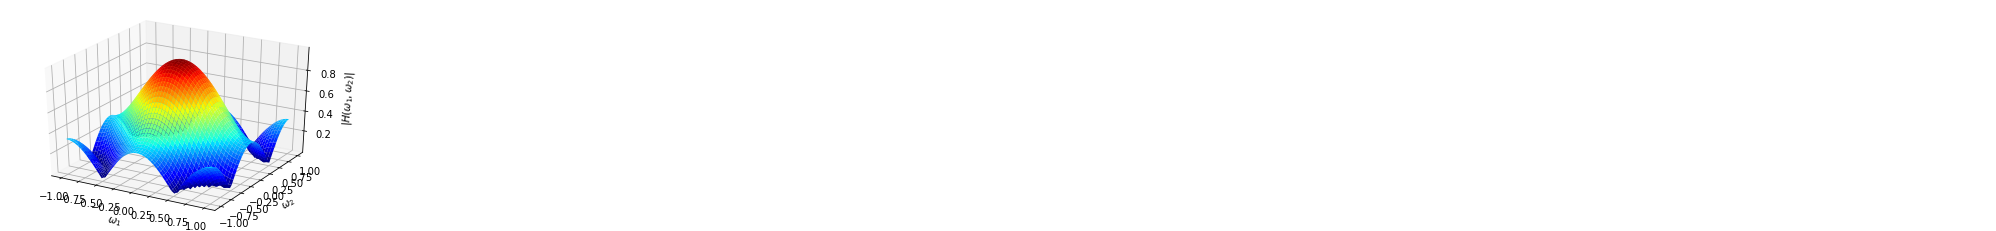

In [54]:
fig = plt.figure()
ax = plt.axes(projection='3d')
#ax.contour3D(X,Y,Z,50, cmap='binary')
ax.plot_surface(X/np.pi, Y/np.pi, Z1, cmap='jet')
ax.set_xlabel('$\omega_1$');
ax.set_ylabel('$\omega_2$');
ax.set_zlabel('$|H(\omega_1,\omega_2)|$');

# Contoh 2
Diberikan kernel atau respon impulse, 
$$
h=
\begin{bmatrix} 
0.075 & 0.124 & 0.075 \\
0.124 & 0.204 & 0.124 \\
0.075 & 0.124 & 0.075 \\
\end{bmatrix}.
$$
Maka didapat $H(\omega_1, \omega_2) = 0.204 + 0.124*2*\cos(\omega_1) + 0.124*2*\cos(\omega_2) + 0.075*2*\cos(\omega_1+\omega_2) + 0.075*2*\cos(\omega_1-\omega_2)$


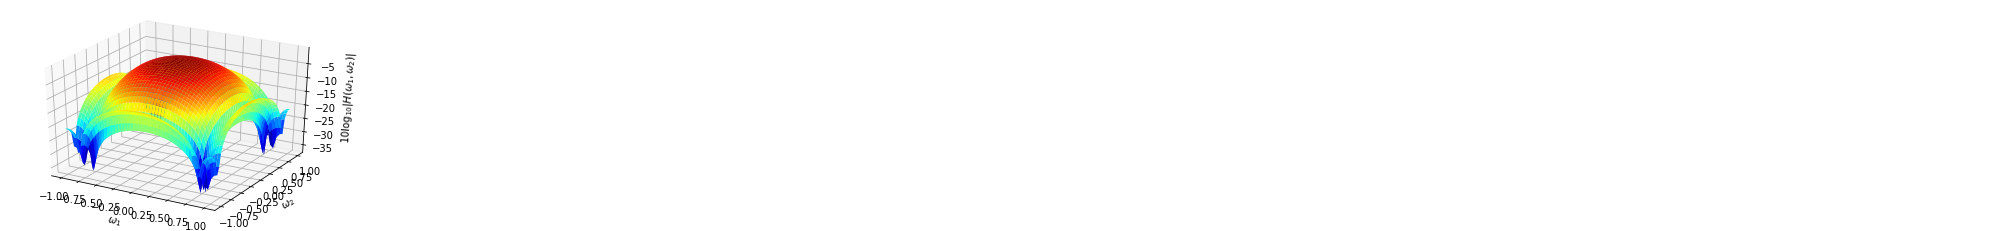

In [55]:
fig = plt.figure()
ax = plt.axes(projection='3d')
#ax.contour3D(X,Y,Z,50, cmap='binary')
ax.plot_surface(X/np.pi, Y/np.pi, Z2, cmap='jet')
ax.set_xlabel('$\omega_1$');
ax.set_ylabel('$\omega_2$');
ax.set_zlabel('$10\log_{10}|H(\omega_1,\omega_2)|$');

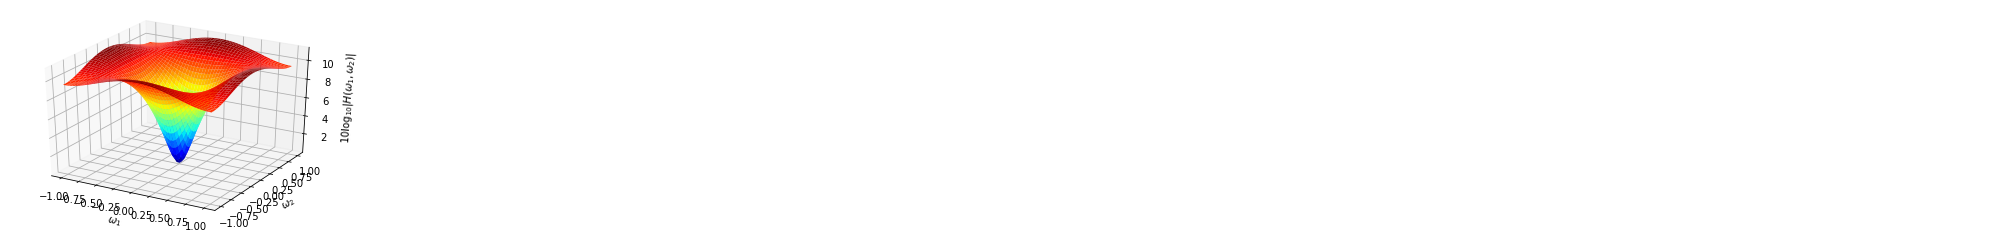

In [56]:
fig = plt.figure()
ax = plt.axes(projection='3d')
#ax.contour3D(X,Y,Z,50, cmap='binary')
ax.plot_surface(X/np.pi, Y/np.pi, Z3, cmap='jet')
ax.set_xlabel('$\omega_1$');
ax.set_ylabel('$\omega_2$');
ax.set_zlabel('$10\log_{10}|H(\omega_1,\omega_2)|$');

# Teorema Konvolusi

Misalkan suatu sistem LSI memiliki input $x(n_1,n_2)$, kemudian dipetakan dengan fungsi $h(n_1,n_2)$ dan menghasilkan output $y(n_1,n_2)$ pada _domain spasial_, atau dapat ditulis
$$ y(n_1,n_2) = x(n_1,n_2) \circledast h(n_1,n_2)$$.

Pada _domain frekuensi_ misalkan suatu sistem LSI memiliki input $X(\omega_1,\omega_2)$, kemudian dipetakan dengan fungsi $H(\omega_1,\omega_2)$ dan menghasilkan output $Y(\omega_1,\omega_2)$, maka hal tersebut dapat ditulis ke dalam persamaan
$$Y(\omega_1,\omega_2)=X(\omega_1,\omega_2).H(\omega_1,\omega_2)$$

__Bukti.__

Karena LSI maka

\begin{eqnarray}
y(n_1,n_2)&=& T[x(n_1,n_2)] \\
          &=& T \left[ \frac{1}{4\pi^2}\int_{-\pi}^{\pi}\int_{-\pi}^{\pi} X(\omega_1, \omega_2) e^{j \omega_1n_1} e^{j \omega_2n_2} d\omega_1 d\omega_2 \right]. \\
\end{eqnarray}

Karena pada sistem LSI $X(\omega_1, \omega_2)$ merupakan bobot dan bernilai konstan maka

\begin{eqnarray}
y(n_1,n_2) &=& \frac{1}{4\pi^2} \int_{-\pi}^{\pi}\int_{-\pi}^{\pi} X(\omega_1, \omega_2) . T \left[ e^{j \omega_1n_1} e^{j \omega_2n_2} \right] d\omega_1 d\omega_2.
\end{eqnarray}

Kita tahu bahwa sistem LSI $T \left[ e^{j \omega_1n_1} e^{j \omega_2n_2} \right]=e^{j \omega_1n_1} e^{j \omega_2n_2}.H(\omega_1,\omega_2)$. Sehingga

\begin{eqnarray}
y(n_1,n_2) &=& \frac{1}{4\pi^2} \int_{-\pi}^{\pi}\int_{-\pi}^{\pi} X(\omega_1, \omega_2) . H(\omega_1,\omega_2) e^{j \omega_1n_1} e^{j \omega_2n_2} d\omega_1 d\omega_2.
\end{eqnarray}

Berdasarkan definisi invers tranformasi Fourier:
\begin{eqnarray}
y(n_1,n_2) &=& \frac{1}{4\pi^2} \int_{-\pi}^{\pi}\int_{-\pi}^{\pi} Y(\omega_1, \omega_2) e^{j \omega_1n_1} e^{j \omega_2n_2} d\omega_1 d\omega_2.
\end{eqnarray}

Oleh karena itu,
\begin{eqnarray}
y(n_1,n_2) &=& \frac{1}{4\pi^2} \int_{-\pi}^{\pi}\int_{-\pi}^{\pi} X(\omega_1, \omega_2) . H(\omega_1,\omega_2) e^{j \omega_1n_1} e^{j \omega_2n_2} d\omega_1 d\omega_2 \\ 
           &=& \frac{1}{4\pi^2} \int_{-\pi}^{\pi}\int_{-\pi}^{\pi} Y(\omega_1, \omega_2) e^{j \omega_1n_1} e^{j \omega_2n_2} d\omega_1 d\omega_2. 
\end{eqnarray}

Dengan demikian terbukti bahwa $Y(\omega_1,\omega_2)=X(\omega_1,\omega_2).H(\omega_1,\omega_2)$.

# Transformasi Fourier Diskrit (DFT) 2D

DFT didefinisikan
$$
X(\omega_1,\omega_2) = \sum_{n_1=0}^{N_1-1} \sum_{n_2=0}^{N_2-1} x(n_1,n_2) e^{-j \omega_1 n_1} e^{-j \omega_2 n_2} 
$$
Karena terdapat proses sampling maka 
$$X(k_1,k_2) = X(\omega_1,\omega_2)$$
dengan $\omega_1 = \frac{2\pi}{N_1}k_1$ dan $\omega_1 = \frac{2\pi}{N_2}k_2$, dimana $k_1=0,\dots, N_1-1$ dan $k_2=0,\dots, N_2-1.$ 

Sehingga persamaan DFT dapat ditulis
$$
X(k_1,k_2) = \sum_{n_1=0}^{N_1-1} \sum_{n_2=0}^{N_2-1} x(n_1,n_2) e^{-j \frac{2\pi}{N_1} n_1k_1} e^{-j \frac{2\pi}{N_2} n_2k_2}
$$ dimana $k_1=0,\dots, N_1-1$ dan $k_2=0,\dots, N_2-1.$

Invers DFT didefinisikan
$$
x(n_1,n_2) = \frac{1}{N_1N_2} \sum_{k_1=0}^{N_1-1} \sum_{k_2=0}^{N_2-1} x(k_1,k_2) e^{j \frac{2\pi}{N_1} n_1k_1} e^{j \frac{2\pi}{N_2} n_2k_2}
$$ dimana $n_1=0,\dots, N_1-1$ dan $n_2=0,\dots, N_2-1.$

### Kompleksitas Algoritma DFT
1. Komputasi langsung (Brute-Force)

Untuk setiap $(k_1, k_2)$ maka terjadi $N_1N_2$ perkalian dan totalnya $N_1^2N_2^2$. Jika $N_1=N_2=N$ maka secara kasar dapat ditulis $O(N^4)$.
2. Dekomposisi baris-kolom

$$X(k_1,k_2) = \sum_{n_1=0}^{N_1-1} \left[ \sum_{n_2=0}^{N_2-1} x(n_1,n_2) e^{-j \frac{2\pi}{N_2} n_2k_2} \right] e^{-j \frac{2\pi}{N_1} n_1k_1} = \sum_{n_1=0}^{N_1-1} G(n,k_2) e^{-j \frac{2\pi}{N_1} n_1k_1}$$ 
* Jika dihitung secara langsung maka $N_1N_2^2+N_2N_1^2$. Jika Jika $N_1=N_2=N$ maka secara kasar dapat ditulis $O(N^3)$
* Pada tahun 1965, Cooley dan Tukey membuat suatu algoritma yang efisien untuk menghitung DFT sehingga memiliki komputasi yang lebih kecil, algoritma tersebut disebut juga __Fast Fourier Transform (FFT)__. Kompleksitas FFT adalah $O(N^2 \log_2N)$. 

In [57]:
import scipy.ndimage as ndimage
from skimage import io

In [58]:
image_spatial = io.imread('lena.jpg')

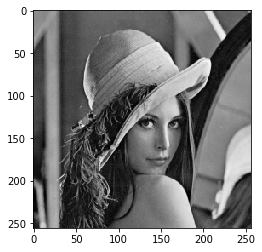

In [59]:
plt.imshow(image_spatial, cmap='gray')

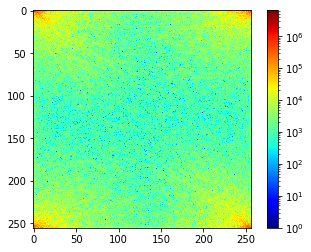

In [60]:
image_freq = np.fft.fft2(image_spatial)

from matplotlib.colors import LogNorm
plt.imshow(np.abs(image_freq), norm=LogNorm(vmin=1), cmap='jet')
plt.colorbar()

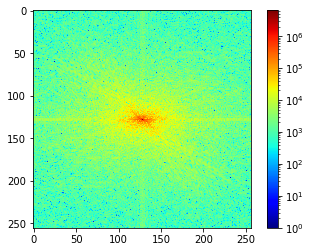

In [61]:
shift_image_freq = np.fft.fftshift(image_freq)
plt.imshow(np.abs(shift_image_freq), norm=LogNorm(vmin=1), cmap='jet')
plt.colorbar()

In [62]:
x = np.linspace(-np.pi, np.pi, 256)
y = np.linspace(-np.pi, np.pi, 256)

X, Y = np.meshgrid(x, y)
H = (1+np.cos(X)+np.cos(Y))/3

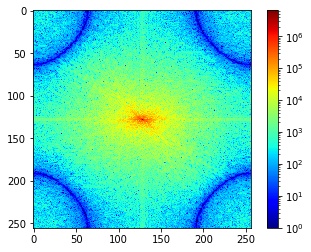

In [63]:
image_filter = shift_image_freq*H
plt.imshow(np.abs(image_filter), norm=LogNorm(vmin=1), cmap='jet')
plt.colorbar()

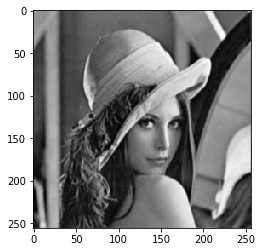

In [64]:
image_filter_ifft = np.fft.ifft2(image_filter)
plt.imshow(np.abs(image_filter_ifft), cmap='gray')

In [65]:
x = np.linspace(-np.pi, np.pi, 256)
y = np.linspace(-np.pi, np.pi, 256)

X, Y = np.meshgrid(x, y)
H = 9-2*np.cos(X)-2*np.cos(Y)-2*np.cos(X+Y)-2*np.cos(X-Y)
#H = 0.204+0.124*2*np.cos(X)+0.124*2*np.cos(Y)+0.075*2*np.cos(X+Y)+ 0.075*2*np.cos(X-Y)

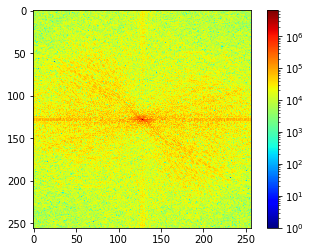

In [66]:
image_filter = shift_image_freq*H
plt.imshow(np.abs(image_filter), norm=LogNorm(vmin=1), cmap='jet')
plt.colorbar()

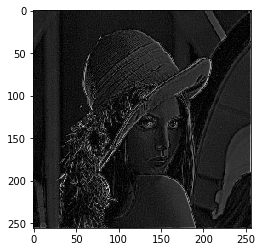

In [67]:
image_filter_ifft = np.fft.ifft2(image_filter)
plt.imshow(np.abs(image_filter_ifft), cmap='gray')

# Filtering di Domain Frekuensi

## Ideal Lowpass Filter (ILPF)
ILPF didefinisikan
$$ 
H(\omega_1,\omega_2) = 
\begin{cases}
    1, \text{jika } d(\omega_1,\omega_2) \leq d_0 \\
    0, \text{yang lainnya },
\end{cases}
$$
dimana $d_0$ adalah suatu nilai "cut-off" yang mempengaruhi ukuran dari filter dan $d(\omega_1.\omega_2)$ adalah jarak Euclidean dari titik $(\omega_1, \omega_2)$ ke titik asal dari domain Fourier. Catatan, untuk image berukuran $M \times N$ maka koordinat asalnya adalah $\left( \frac{M}{2}, \frac{N}{2} \right)$. 

In [68]:
    image = io.imread('char.tif')
    print(image)

[[229 229 229 ... 229 229 229]
 [229 229 229 ... 229 229 229]
 [229 229 229 ... 229 229 229]
 ...
 [229 229 229 ... 229 229 229]
 [229 229 229 ... 229 229 229]
 [229 229 229 ... 229 229 229]]


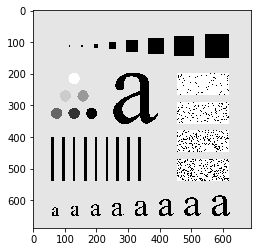

In [69]:
plt.imshow(image, cmap='gray')

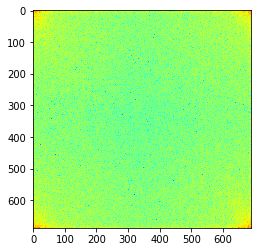

In [70]:
# Lakukan FFT pada image
image_freq = np.fft.fft2(image)
plt.imshow(np.abs(image_freq), norm=LogNorm(vmin=1), cmap='jet')

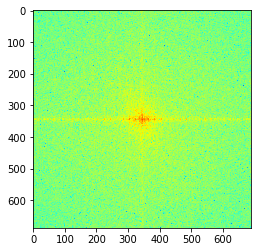

In [71]:
# Lakukan shifting sehingga frekuensi yang kecil berada di pusat
image_shift = np.fft.fftshift(image_freq)
plt.imshow(np.abs(image_shift), norm=LogNorm(vmin=1), cmap='jet')

In [72]:
# inisial variabel untuk H
M = image_shift.shape[0]
N = image_shift.shape[1]

H = np.ones((M,N))
center1 = M/2
center2 = N/2
d_0 = 40.0

In [73]:
# definisikan H untuk ILPF
for i in range(1,M):
    for j in range(1,N):
        r1 = (i-center1)**2 + (j-center2)**2
        # hitung jarak euclidean dari titik asal
        r = np.sqrt(r1)
        if r > d_0:
            H[i,j] = 0.0

[[1. 1. 1. ... 1. 1. 1.]
 [1. 0. 0. ... 0. 0. 0.]
 [1. 0. 0. ... 0. 0. 0.]
 ...
 [1. 0. 0. ... 0. 0. 0.]
 [1. 0. 0. ... 0. 0. 0.]
 [1. 0. 0. ... 0. 0. 0.]]


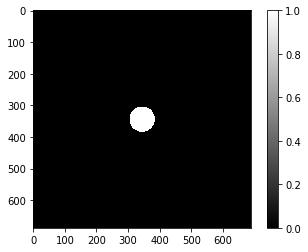

In [74]:
plt.imshow(H, cmap='gray')
plt.colorbar()

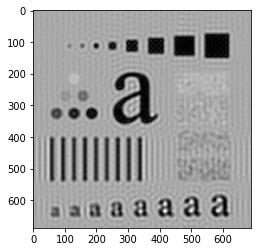

In [75]:
image_filter = image_shift * H

# Hitung energi inverse FFT dari image filter
e = np.abs(np.fft.ifft2(image_filter))
plt.imshow(e, cmap='gray')

## Butterworth Lowpass Filter (BLPF)

BLPF didefinisikan

$$
H(\omega_1, \omega_2)=\frac{1}{1+\left(\frac{d(\omega_1,\omega_2)}{d_0} \right)^2},
$$
dimana $d_0$ adalah jarak "cut-off" dari titik asal frekuensi dan $d(\omega_1, \omega_2)$ adalah jarak Euclidean dari titik asal.

In [76]:
# inisial variabel untuk H
M = image_shift.shape[0]
N = image_shift.shape[1]

H = np.ones((M,N))
center1 = M/2
center2 = N/2
d_0 = 30.0

In [77]:
# definisikan H untuk BLPF
for i in range(1,M):
    for j in range(1,N):
        r1 = (i-center1)**2 + (j-center2)**2
        # hitung jarak euclidean dari titik asal
        r = np.sqrt(r1)
        if r > d_0:
            H[i,j] = 1/(1+(r/d_0)**2)

print(H)

[[1.         1.         1.         ... 1.         1.         1.        ]
 [1.         0.00381036 0.00382145 ... 0.00383256 0.00382145 0.00381036]
 [1.         0.00382145 0.00383259 ... 0.00384377 0.00383259 0.00382145]
 ...
 [1.         0.00383256 0.00384377 ... 0.00385502 0.00384377 0.00383256]
 [1.         0.00382145 0.00383259 ... 0.00384377 0.00383259 0.00382145]
 [1.         0.00381036 0.00382145 ... 0.00383256 0.00382145 0.00381036]]


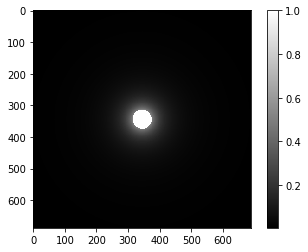

In [78]:
plt.imshow(H, cmap='gray')
plt.colorbar()

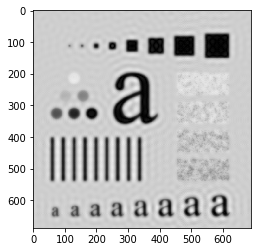

In [79]:
image_filter = image_shift * H

# Hitung energi inverse FFT dari image filter
e = np.abs(np.fft.ifft2(image_filter))
plt.imshow(e, cmap='gray')

## Gaussian Lowpass Filter

GLPF didefinisikan sebagai

$$
H(\omega_1,\omega_2) = e^{\frac{-d^2(\omega_1, \omega_2)}{2d_0^2}}
$$

dimana $d_0$ adalah "cut-off" frekuensi dan $d(\omega_1,\omega_2)$ adalah jarak Euclidean dari titik asal.

In [80]:
# inisial variabel untuk H
M = image_shift.shape[0]
N = image_shift.shape[1]

H = np.ones((M,N))
center1 = M/2
center2 = N/2
d_0 = 30.0

In [81]:
# definisikan H untuk GLPF
for i in range(1,M):
    for j in range(1,N):
        r1 = (i-center1)**2 + (j-center2)**2
        # hitung jarak euclidean dari titik asal
        r = np.sqrt(r1)
        if r > d_0:
            H[i,j] = (np.exp(-(r**2)/(2*(d_0**2))))

print(H)

[[1.00000000e+00 1.00000000e+00 1.00000000e+00 ... 1.00000000e+00
  1.00000000e+00 1.00000000e+00]
 [1.00000000e+00 1.69255495e-57 2.47637239e-57 ... 3.61914999e-57
  2.47637239e-57 1.69255495e-57]
 [1.00000000e+00 2.47637239e-57 3.62317351e-57 ... 5.29516820e-57
  3.62317351e-57 2.47637239e-57]
 ...
 [1.00000000e+00 3.61914999e-57 5.29516820e-57 ... 7.73874237e-57
  5.29516820e-57 3.61914999e-57]
 [1.00000000e+00 2.47637239e-57 3.62317351e-57 ... 5.29516820e-57
  3.62317351e-57 2.47637239e-57]
 [1.00000000e+00 1.69255495e-57 2.47637239e-57 ... 3.61914999e-57
  2.47637239e-57 1.69255495e-57]]


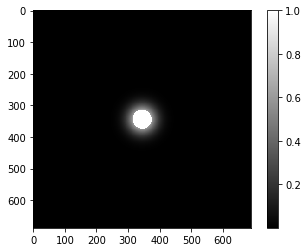

In [82]:
plt.imshow(H, cmap='gray')
plt.colorbar()

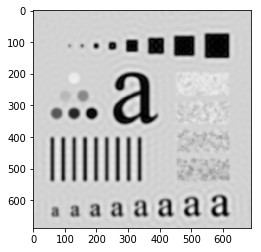

In [83]:
image_filter = image_shift * H

# Hitung energi inverse FFT dari image filter
e = np.abs(np.fft.ifft2(image_filter))
plt.imshow(e, cmap='gray')

## Ideal Highpass Filter (IHPF)
IHPF didefinisikan sebagai
$$ 
H(\omega_1,\omega_2) = 
\begin{cases}
    0, \text{jika } d(\omega_1,\omega_2) \leq d_0 \\
    1, \text{yang lainnya },
\end{cases}
$$

In [84]:
# inisial variabel untuk H
M = image_shift.shape[0]
N = image_shift.shape[1]

H = np.ones((M,N))
center1 = M/2
center2 = N/2
d_0 = 40.0

In [85]:
# definisikan H untuk IHPF
for i in range(1,M):
    for j in range(1,N):
        r1 = (i-center1)**2 + (j-center2)**2
        # hitung jarak euclidean dari titik asal
        r = np.sqrt(r1)
        if r < d_0:
            H[i,j] = 0.0

print(H)

[[1. 1. 1. ... 1. 1. 1.]
 [1. 1. 1. ... 1. 1. 1.]
 [1. 1. 1. ... 1. 1. 1.]
 ...
 [1. 1. 1. ... 1. 1. 1.]
 [1. 1. 1. ... 1. 1. 1.]
 [1. 1. 1. ... 1. 1. 1.]]


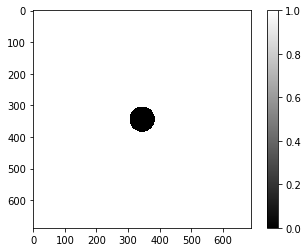

In [86]:
plt.imshow(H, cmap='gray')
plt.colorbar()

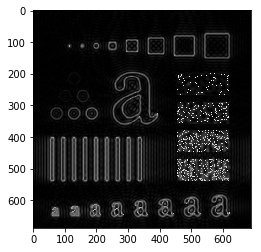

In [87]:
image_filter = image_shift * H

# Hitung energi inverse FFT dari image filter
e = np.abs(np.fft.ifft2(image_filter))
plt.imshow(e, cmap='gray')

## Butterworth Highpass Filter (BHPF)

BHPF didefinisikan

$$
H(\omega_1, \omega_2)=1-\frac{1}{1+\left(\frac{d(\omega_1,\omega_2)}{d_0} \right)^2},
$$
dimana $d_0$ adalah jarak "cut-off" dari titik asal frekuensi dan $d(\omega_1, \omega_2)$ adalah jarak Euclidean dari titik asal.

In [88]:
# definisikan H untuk BHPF
for i in range(1,M):
    for j in range(1,N):
        r1 = (i-center1)**2 + (j-center2)**2
        # hitung jarak euclidean dari titik asal
        r = np.sqrt(r1)
        if r > d_0:
            H[i,j] = 1-(1/(1+(r/d_0)**2))

print(H)

[[1.         1.         1.         ... 1.         1.         1.        ]
 [1.         0.99324604 0.99322645 ... 0.99320681 0.99322645 0.99324604]
 [1.         0.99322645 0.99320675 ... 0.993187   0.99320675 0.99322645]
 ...
 [1.         0.99320681 0.993187   ... 0.99316712 0.993187   0.99320681]
 [1.         0.99322645 0.99320675 ... 0.993187   0.99320675 0.99322645]
 [1.         0.99324604 0.99322645 ... 0.99320681 0.99322645 0.99324604]]


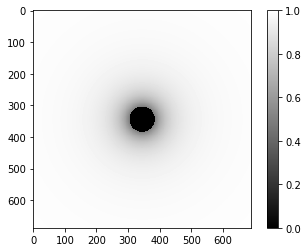

In [89]:
plt.imshow(H, cmap='gray')
plt.colorbar()

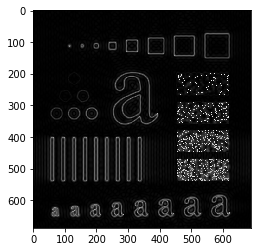

In [90]:
image_filter = image_shift * H

# Hitung energi inverse FFT dari image filter
e = np.abs(np.fft.ifft2(image_filter))
plt.imshow(e, cmap='gray')

## Gaussian Highpass Filter

GHPF didefinisikan sebagai

$$
H(\omega_1,\omega_2) = 1-e^\left({\frac{-d^2(\omega_1, \omega_2)}{2d_0^2}}\right)
$$

dimana $d_0$ adalah "cut-off" frekuensi dan $d(\omega_1,\omega_2)$ adalah jarak Euclidean dari titik asal.

In [91]:
# definisikan H untuk GHPF
for i in range(1,M):
    for j in range(1,N):
        r1 = (i-center1)**2 + (j-center2)**2
        # hitung jarak euclidean dari titik asal
        r = np.sqrt(r1)
        if r > d_0:
            H[i,j] = 1 - (np.exp(-(r**2)/(2*(d_0**2))))

print(H)

[[1. 1. 1. ... 1. 1. 1.]
 [1. 1. 1. ... 1. 1. 1.]
 [1. 1. 1. ... 1. 1. 1.]
 ...
 [1. 1. 1. ... 1. 1. 1.]
 [1. 1. 1. ... 1. 1. 1.]
 [1. 1. 1. ... 1. 1. 1.]]


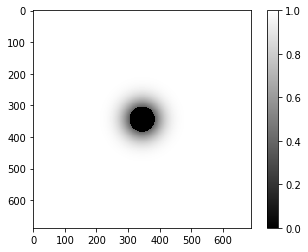

In [92]:
plt.imshow(H, cmap='gray')
plt.colorbar()

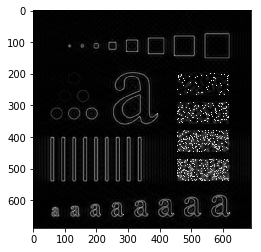

In [93]:
image_filter = image_shift * H

# Hitung energi inverse FFT dari image filter
e = np.abs(np.fft.ifft2(image_filter))
plt.imshow(e, cmap='gray')